<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**<p>
**Componente curricular:** BIG DATA ANALYTICS: ANÁLISE ESTATÍSTICA - 91162 - 2022.2 - 01D - Trilha 4.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/AE_T4.ipynb<br>
***

### **Atividade - Trilha 4**

A atividade desta trilha será a resolução de alguns problemas de Análise de Regressão Simples utilizando o **R**.

#### **Problema 1**

Para uma amostra de oito operadores de máquina, foram coletados o número de horas de treinamento (x) e o tempo necessário para completar o trabalho (y). Os dados coletados encontram-se na tabela abaixo:

|||||||||||
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| **treinamento** | **x** | 5.2 | 5.1 | 4.9 | 4.6 | 4.7 | 4.8 | 4.6 | 4.9 |
| **trabalho** | **y** | 13 | 15 | 16 | 20 | 19 | 17 | 21 | 16 |

Com estes dados, faça:

a) Um gráfico de dispersão para os dados.

b) Determine o modelo de regressão linear simples entre as variáveis x e y, sendo y a variável resposta.

c) Faça uma análise do modelo de regressão utilizando a função "summary":

    i) resíduos, significância estatística dos coeficientes, percentual de variância explicada pelo modelo.

d) Trace, no gráfico anterior, a reta de regressão.

#### **Problema 2**

O site "Gapminder" compilou uma base com dados sobre população, expectativa de vida e PIB per capta de 142 países, em 12 anos diferentes.

Com estes dados, disponibilizados no arquivo pib_gapminder.csv, faça:

a) Faça a importação dos dados, verifique a estrutura e faça um sumário estatístico.

b) Verifique a estrutura dos dados (str).

c) Classifique cada variável de acordo com seu tipo (qualitativa ordinal, nominal, quantitativa discreta, contínua, etc).

d) Faça um sumário estatístico dos dados.

e) Faça uma tabela de frequência absoluta e uma tabela de frequência relativa para verificar o número de observações por continente.

f) Faça um gráfico de barras da tabela de frequência absoluta dos continentes.

g) Faça um gráfico apropriado para relacionar o PIB per capta à expectativa de vida.

h) Crie duas novas colunas nesta base de dados com o logaritmo de PIB per capta, e o logaritmo da expectativa de vida. Estas colunas devem ter os nomes: lpibPercap e lexpVida, respectivamente.

i) Faça um gráfico apropriado para relacionar estas duas novas variáveis.

j) Ajuste um modelo linear aos dados, utilizando as duas novas variáveis criadas, sendo lexpVida a variável resposta.

k) Faça todas as análises da regressão, julgando:

    i) Os gráficos diagnósticos;

    ii) Os parâmetros obtidos (avaliar o "summary" do modelo);

    iii) O poder de explicação do modelo.

#### **Problema 3**

Neste exercício vamos fazer uma análise de regressão com a base de dados "autos.csv" para tentar prever o preço do carro a partir de sua potência. Na nossa base de dados, estas variáveis são "horsepower" e "price".

Utilizando então a base disponibilizada, você deve:

a) Criar um dicionário de dados, para entender o significado e o tipo de cada variável; veja no link fornecido se há documentação disponível. 

- http://archive.ics.uci.edu/ml/datasets/Automobile

b) Carregar a base para o R, certificando-se de que os dados estão corretos, de acordo com o dicionário de dados.

c) Explore a base de dados:

    i) Sumários estatísticos dos dados;

    ii) Tabelas quando apropriado;

    iii) Gráficos exploratórios apropriados.

d) Considerando então apenas uma variável preditora (explicativa) no modelo (horsepower), tente ajustar um modelo para explicar o preço (price) dos carros.

    i) Qual sua intuição sobre o relacionamento da “potência” de um carro com o seu preço?

e) Faça todas as análises da regressão (modelo), julgando:

    i) Os gráficos diagnósticos;

    ii) Os parâmetros obtidos (avaliar o "summary" do modelo).

f) Interprete os resultados do ajuste:

    i) Em que posição a reta corta o eixo Y? Isso faz sentido?

    ii) Como corrigir um modelo que apresenta este comportamento?

g) Analise: será que apenas a potência de um carro é suficiente para termos uma boa previsão do preço deste carro?

    i) O que indica isso no seu ajuste?

Utilizar as seguintes bases de dados disponibilizadas no ambiente:
- pib_gapminder.csv
- autos.csv 

### **Carregando bibliotecas necessárias:**

In [34]:
# install.packages("ggpubr")
# install.packages("plm")
library(tidyverse)
library(ggplot2)
library(readr)
library(ggpubr)
library(plm)

### **Resolução:**

---
#### **Problema 1**
---

**Item a)**

In [35]:
# armazenando os valores de "x" e "y"
x <- c(5.2, 5.1, 4.9, 4.6, 4.7, 4.8, 4.6, 4.9); (x)
y <- c(13, 15, 16, 20, 19, 17, 21, 16); (y)

[1] 5.2 5.1 4.9 4.6 4.7 4.8 4.6 4.9

[1] 13 15 16 20 19 17 21 16

In [36]:
# criando um dataframe com os valores de x e y
df <- data.frame(training = x, work = y); df

training,work
<dbl>,<dbl>
5.2,13
5.1,15
4.9,16
4.6,20
4.7,19
4.8,17
4.6,21
4.9,16


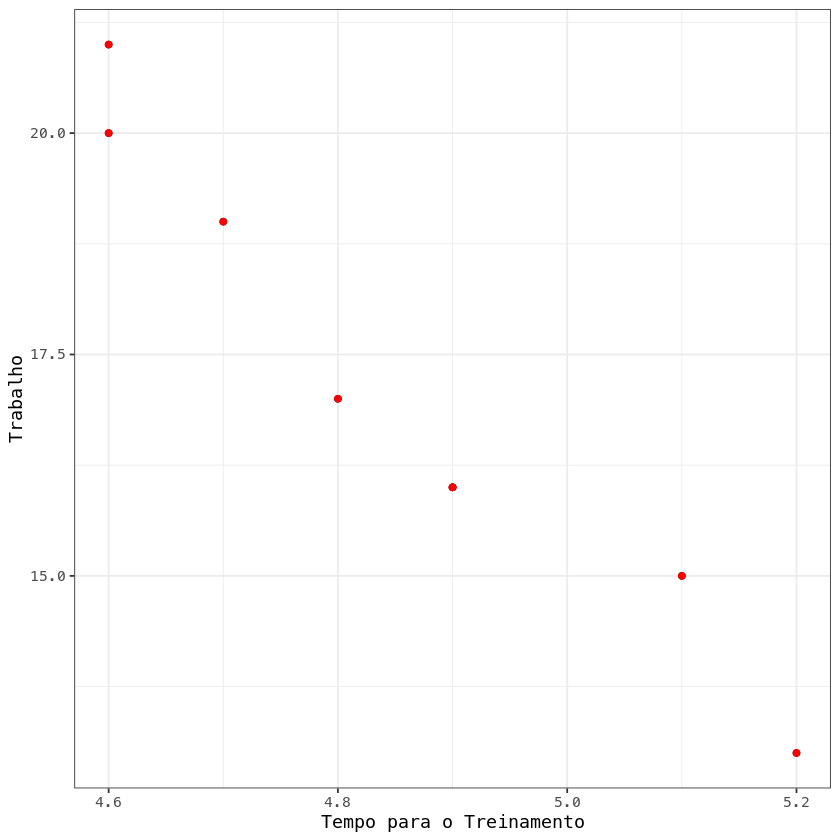

In [37]:
# gerando um gráfico de dispersão para visualizar os valores de x e y
ggplot(data = df, aes(x = training , y = work)) +
  geom_point() +
  geom_point(color = "red", fill="blue") +
  labs(x = "Tempo para o Treinamento", y = "Trabalho") +
  theme_bw()

**Item b)**

In [38]:
# criando o modelo de regressão linear simples entre as variáveis x e y, sendo y a variável resposta
mod <- lm(work ~ training, data = df); mod


Call:
lm(formula = work ~ training, data = df)

Coefficients:
(Intercept)     training  
      74.90       -11.91  


**Item c)**

In [39]:
# gerando o sumário do modelo
summary(mod)


Call:
lm(formula = work ~ training, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.72059 -0.52941 -0.02941  0.27941  0.89706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   74.897      5.514   13.58 9.88e-06 ***
training     -11.912      1.136  -10.49 4.42e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6624 on 6 degrees of freedom
Multiple R-squared:  0.9483,	Adjusted R-squared:  0.9396 
F-statistic:   110 on 1 and 6 DF,  p-value: 4.416e-05


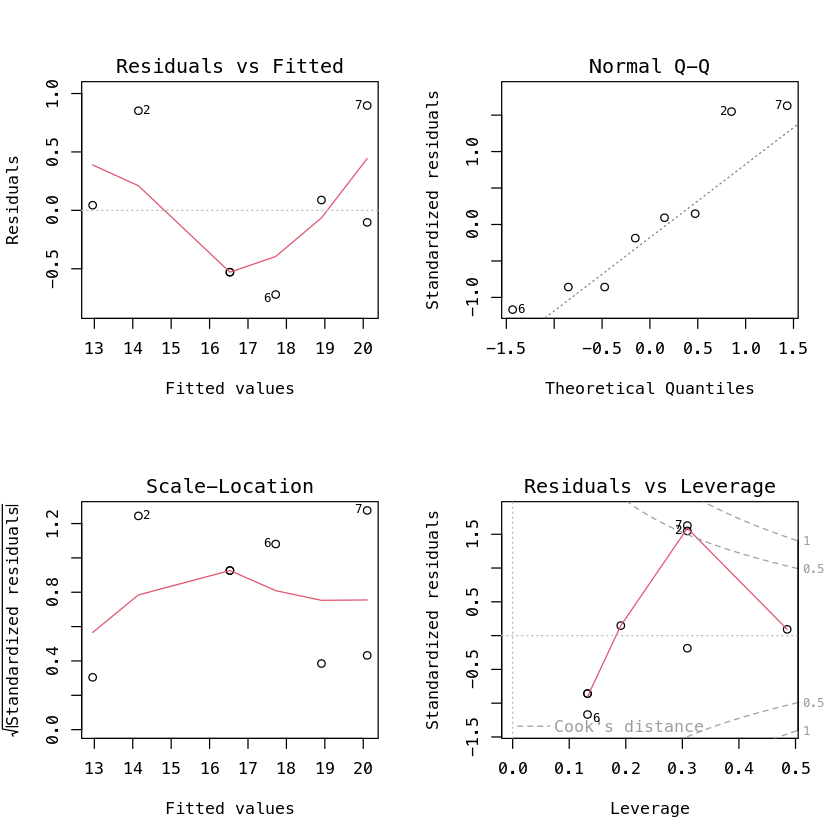

In [40]:
# gerando os gráficos diagnósticos do modelo
par(mfrow=c(2,2))
plot(mod)

Topo esquerda:

Mostra os resíduos no eixo y contra os valores ajustados no eixo x. Não se deve observar estruturas ou padrões no gráfico. Os pontos devem se parecer como o céu estrelado à noite, ou seja, devem estar distribuídos aleatoriamente, sem formar padrões, tendências, etc. 

Neste caso, vemos claramente que os resíduos possuem uma distribuição aleatória.

Topo direita:

Gráfico qqnorm (normal) que deve ser uma linha reta se os erros são normalmente distribuídos. Se o gráfico tivesse a forma de um S ou de uma banana, precisaríamos ajustar um modelo diferente.

Neste caso, vemos claramente que nossos resíduos seguem uma distribuição normal, pois o gráfico qqnorm (normal) esta em linha reta.

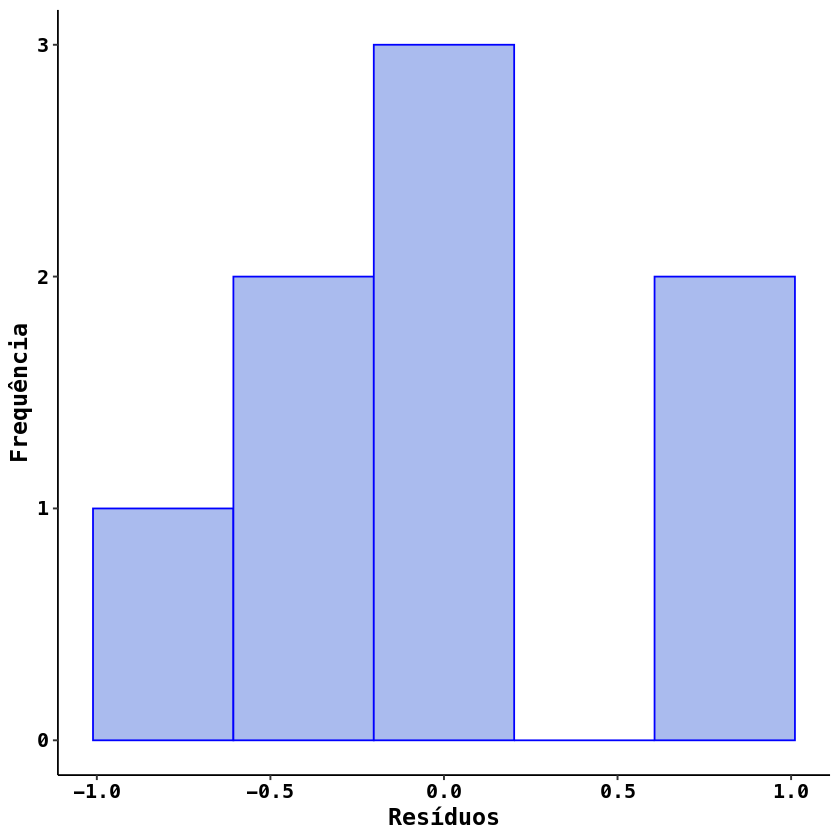

In [41]:
# gerando o histograma dos resíduos
mod.df <- as.data.frame(residuals(mod))
names(mod.df) <- c("residuos")
ggplot(data = mod.df, aes(residuos)) +
    geom_histogram(fill="#aabbee",color = "blue",stat = "bin", bins = 5) +
    theme_pubr() +
    labs_pubr() +
    xlab("Resíduos") +
    ylab("Frequência") +
    theme(plot.caption = element_text(hjust = 0))


No histograma acima confirmamos que nossos resíduos parecem seguir uma distribuição normal, como seria o esperado. Isso indica que nosso modelo realmente NÃO precisa ser modificado.

**Item d)**

`geom_smooth()` using formula 'y ~ x'



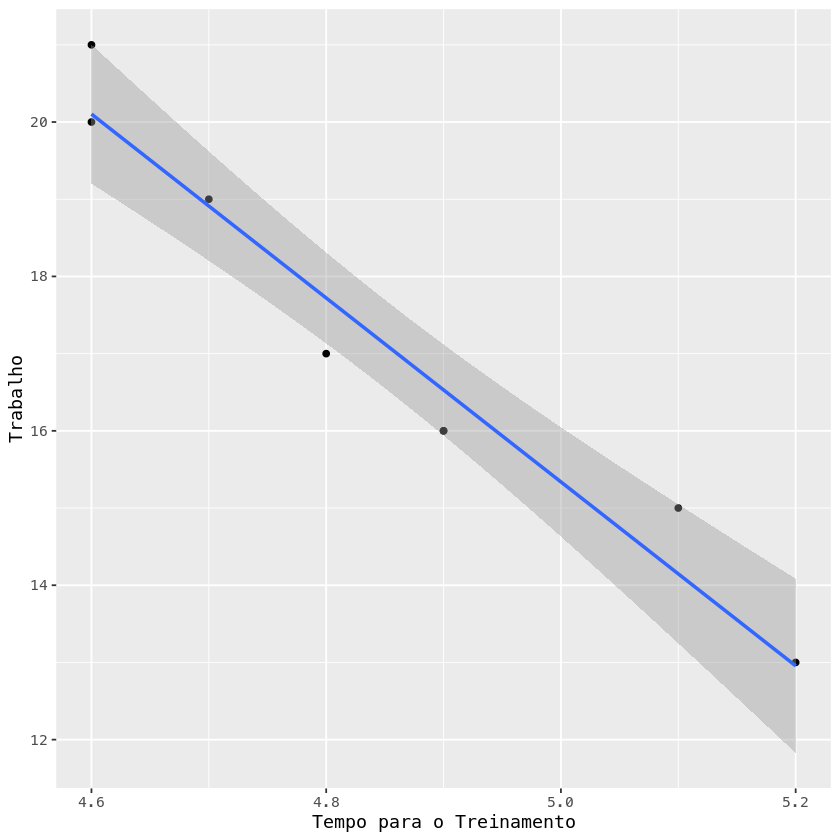

In [42]:
# traçando, no gráfico anterior, a reta de regressão
ggplot(mapping = aes(x, y)) +
    geom_point() +
    geom_smooth(method = "lm") +
    labs(x = "Tempo para o Treinamento", y = "Trabalho") 

---
#### **Problema 2**
---

**Item a)**

In [43]:
# definindo o diretório de datasets
setwd('../data')

# lendo o dataset
d <- read.csv('pib_gapminder.csv', sep=",", header=T)

# removendo valores faltantes (NAs)
dados <- drop_na(d); dados

# gerando o sumário do dataset
summary(dados)

pais,ano,pop,continente,expVida,pibPercap
<chr>,<int>,<dbl>,<chr>,<dbl>,<dbl>
Afghanistan,1952,8425333,Asia,28.801,779.4453
Afghanistan,1957,9240934,Asia,30.332,820.8530
Afghanistan,1962,10267083,Asia,31.997,853.1007
Afghanistan,1967,11537966,Asia,34.020,836.1971
Afghanistan,1972,13079460,Asia,36.088,739.9811
Afghanistan,1977,14880372,Asia,38.438,786.1134
Afghanistan,1982,12881816,Asia,39.854,978.0114
Afghanistan,1987,13867957,Asia,40.822,852.3959
Afghanistan,1992,16317921,Asia,41.674,649.3414


     pais                ano            pop             continente       
 Length:1704        Min.   :1952   Min.   :6.001e+04   Length:1704       
 Class :character   1st Qu.:1966   1st Qu.:2.794e+06   Class :character  
 Mode  :character   Median :1980   Median :7.024e+06   Mode  :character  
                    Mean   :1980   Mean   :2.960e+07                     
                    3rd Qu.:1993   3rd Qu.:1.959e+07                     
                    Max.   :2007   Max.   :1.319e+09                     
    expVida        pibPercap       
 Min.   :23.60   Min.   :   241.2  
 1st Qu.:48.20   1st Qu.:  1202.1  
 Median :60.71   Median :  3531.8  
 Mean   :59.47   Mean   :  7215.3  
 3rd Qu.:70.85   3rd Qu.:  9325.5  
 Max.   :82.60   Max.   :113523.1  

**Item b)**

In [44]:
str(dados)

'data.frame':	1704 obs. of  6 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...


**Item c)**

In [45]:
# classificando as variáveis do dataset
cat('Classificação das variáveis do Dataset:', '\n')
cat('---------------------------------------', '\n')
cat('pais      : chr : Qualitativa Nominal;', '\n')
cat('ano       : int : Quantitativa Intervalar;', '\n')
cat('pop       : num : Qualitativa Discreta;', '\n')
cat('continente: chr : Qualitativa Nominal;', '\n')
cat('expVida   : num : Quantitativa Contínua;', '\n')
cat('pibPercap : num : Qualitativa Contínua.', '\n')

Classificação das variáveis do Dataset: 
--------------------------------------- 
pais      : chr : Qualitativa Nominal; 
ano       : int : Quantitativa Intervalar; 
pop       : num : Qualitativa Discreta; 
continente: chr : Qualitativa Nominal; 
expVida   : num : Quantitativa Contínua; 
pibPercap : num : Qualitativa Contínua. 


**Item d)**

Mostrado no item a).

**Item e)**

In [46]:
# criando uma tabela só com a variável continente
dados_continentes <- table(dados$continente)

# frequência absoluta dos continentes
cat('Frequência absoluta dos continentes:', '\n')
cat('------------------------------------', '\n')
dados_continentes

Frequência absoluta dos continentes: 
------------------------------------ 



  Africa Americas     Asia   Europe  Oceania 
     624      300      396      360       24 

In [47]:
# frequência relativa dos continentes
cat('Frequência relativa dos continentes:', '\n')
cat('------------------------------------', '\n')
prop.table(dados_continentes) * 100

Frequência relativa dos continentes: 
------------------------------------ 



   Africa  Americas      Asia    Europe   Oceania 
36.619718 17.605634 23.239437 21.126761  1.408451 

**Item f)**

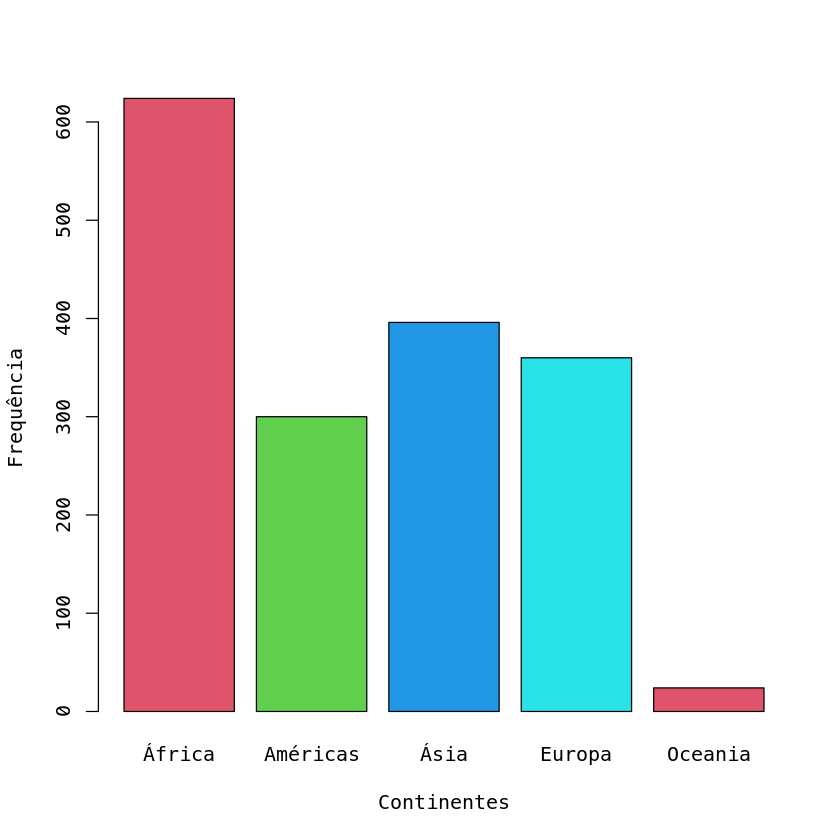

In [48]:
# gráfico de barras da tabela de frequência absoluta dos continentes
barplot(dados_continentes, ylab="Frequência", xlab="Continentes",
        names=c('África', 'Américas', 'Ásia', 'Europa', 'Oceania'), col=2:5)

**Item g)**

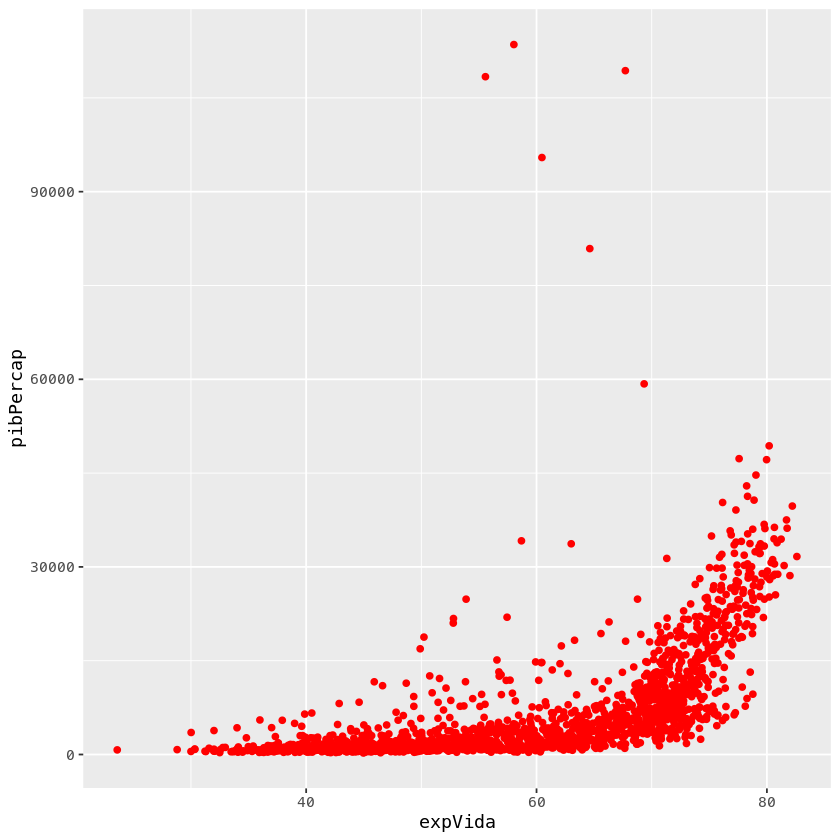

In [49]:
# gráfico para relacionar
# o PIB per capta à expectativa de vida.
ggplot(data = na.omit(dados), aes(x = expVida, y = pibPercap)) +
    geom_point(color = 'red', fill='blue') + xlab('expVida') +
    ylab('pibPercap') +
    theme(plot.caption = element_text(hjust = 0))

**Item h)**

In [50]:
# criando duas novas colunas no dataset com o logaritmo
# da variável "expVida" e o logaritmo da variável "pibPercap"
lexpVida <- log(dados$expVida)
lpibPercap <- log(dados$pibPercap)
dados_novo <- dados
dados_novo['lexpVida'] <- lexpVida
dados_novo['lpibPercap'] <- lpibPercap
str(dados_novo)

'data.frame':	1704 obs. of  8 variables:
 $ pais      : chr  "Afghanistan" "Afghanistan" "Afghanistan" "Afghanistan" ...
 $ ano       : int  1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 ...
 $ pop       : num  8425333 9240934 10267083 11537966 13079460 ...
 $ continente: chr  "Asia" "Asia" "Asia" "Asia" ...
 $ expVida   : num  28.8 30.3 32 34 36.1 ...
 $ pibPercap : num  779 821 853 836 740 ...
 $ lexpVida  : num  3.36 3.41 3.47 3.53 3.59 ...
 $ lpibPercap: num  6.66 6.71 6.75 6.73 6.61 ...


**Item i)**

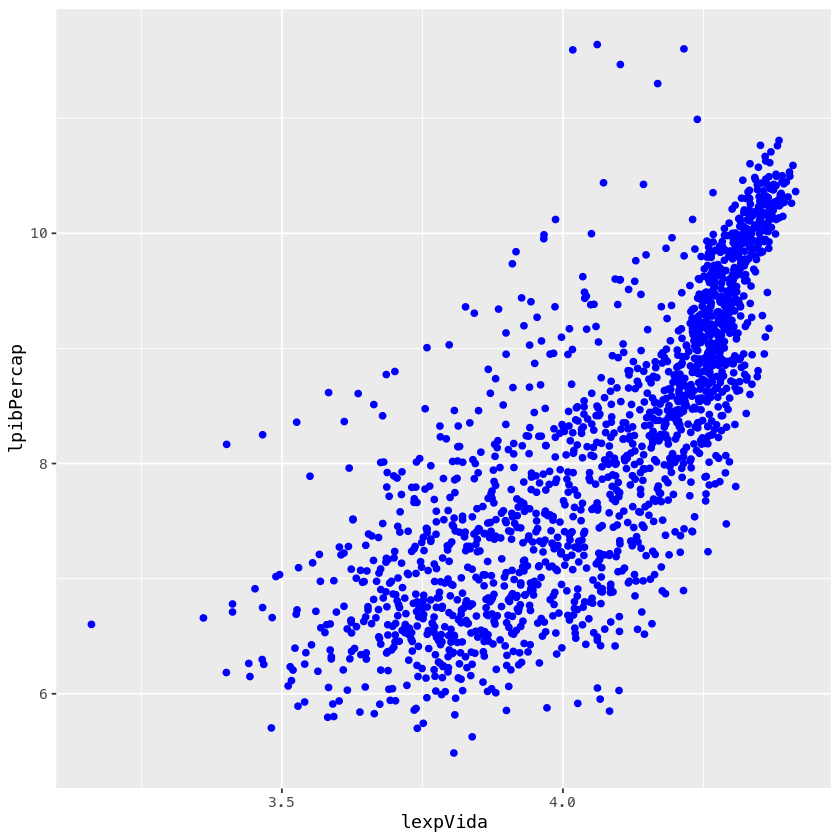

In [51]:
# gráfico para relacionar
# o logaritmo do PIB per capta ao logaritmo da expectativa de vida.
ggplot(data = na.omit(dados_novo), aes(x = lexpVida, y = lpibPercap)) +
    geom_point(color = 'blue', fill='red') + xlab('lexpVida') +
    ylab('lpibPercap') +
    theme(plot.caption = element_text(hjust = 0))

**Item j)**

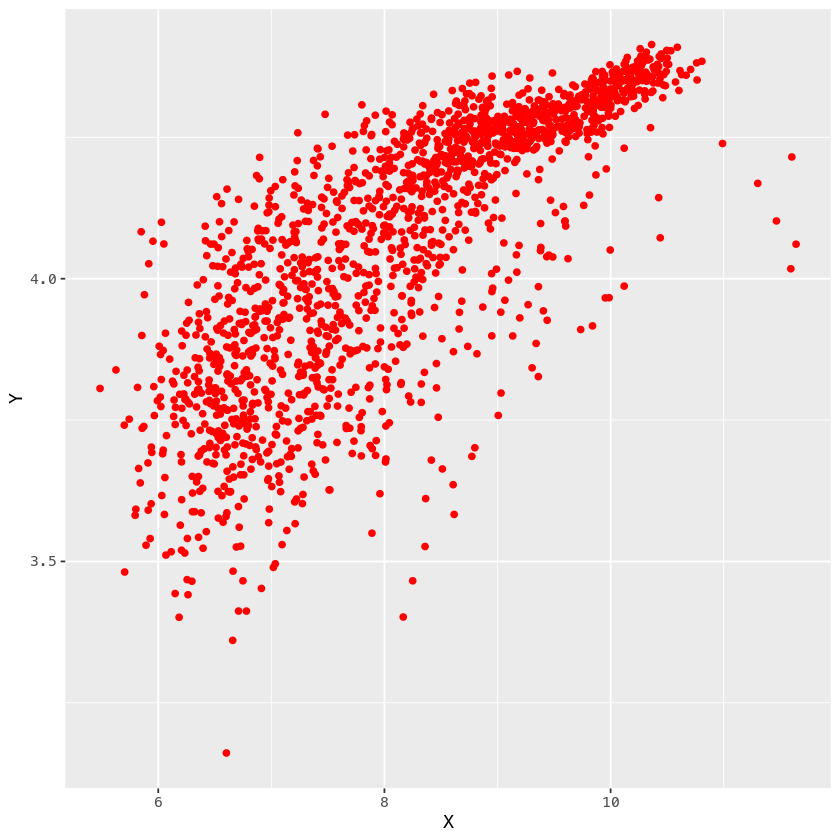

In [52]:
# ajustando um modelo linear utilizando as duas novas variáveis criadas,
# sendo "lexpVida" a variável resposta
X <- dados_novo$lpibPercap
Y <- dados_novo$lexpVida
n <- length(X)
ggplot(data = dados_novo, aes(x = X, y = Y)) +
    geom_point(color = "red", fill="blue") +
    xlab("X") +
    ylab("Y") +
    theme(plot.caption = element_text(hjust = 0))

In [53]:
# ajustando um modelo linear utilizando as duas novas variáveis criadas,
# sendo "lexpVida" a variável resposta
mod_reglinear <- lm(Y ~ X, dados_novo); mod_reglinear


Call:
lm(formula = Y ~ X, data = dados_novo)

Coefficients:
(Intercept)            X  
     2.8642       0.1465  


**Item k)**

- **i - Gráficos diagnósticos**

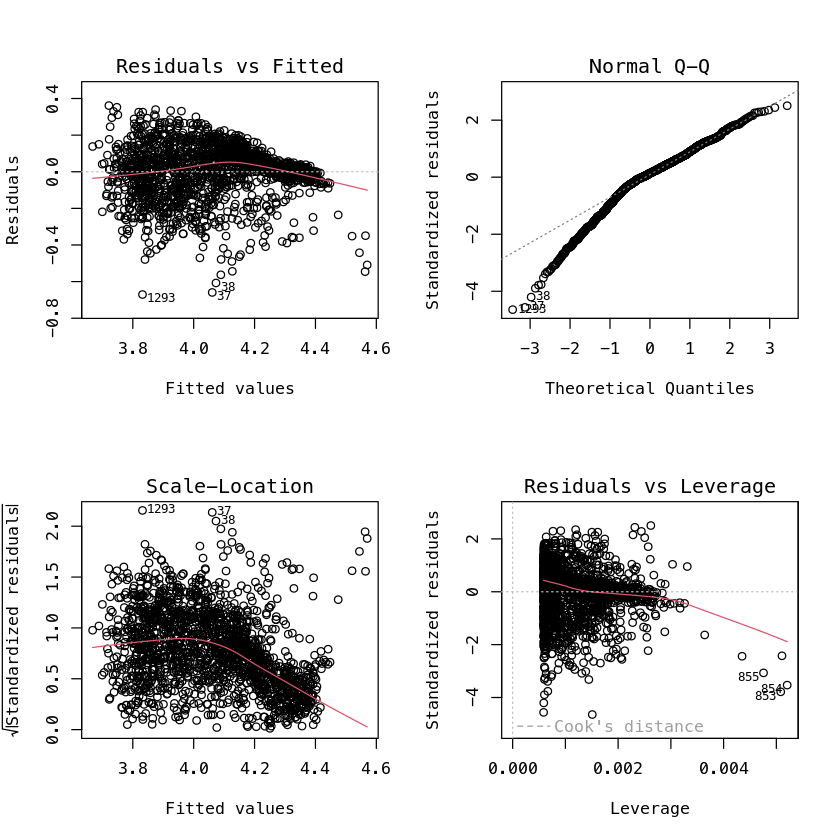

In [54]:
# exibindo os gráficos diagnósticos
par(mfrow=c(2,2))
plot(mod_reglinear) 

Topo esquerda:

O gráfico mostra os resíduos no eixo y contra os valores ajustados no eixo x. Neste caso, os resíduos se aproximam de uma distribuição aleatória, no entanto, para valores maiores da variável resposta há indícios de que os dados seguem um padrão parecido e que, portanto, ajustar uma reta não é a melhor opção de modelo.

Topo direita:

O gráfico apresenta qqnorm (normal) que deve ser uma linha reta se os erros são normalmente distribuídos. Neste gráfico, vemos que os resíduos apresentam uma certa curvatura e fogem um pouco da linha reta da normalidade. Há uma discrepância na parte inferior do gráfico, indicando que eles seguem alguma outra distribuição.

A suposição do modelo é de que os resíduos possuam uma distribuição normal com média 0 e variância constante, então podemos verificar essa suposição fazendo um histograma destes resíduos, conforme abaixo:

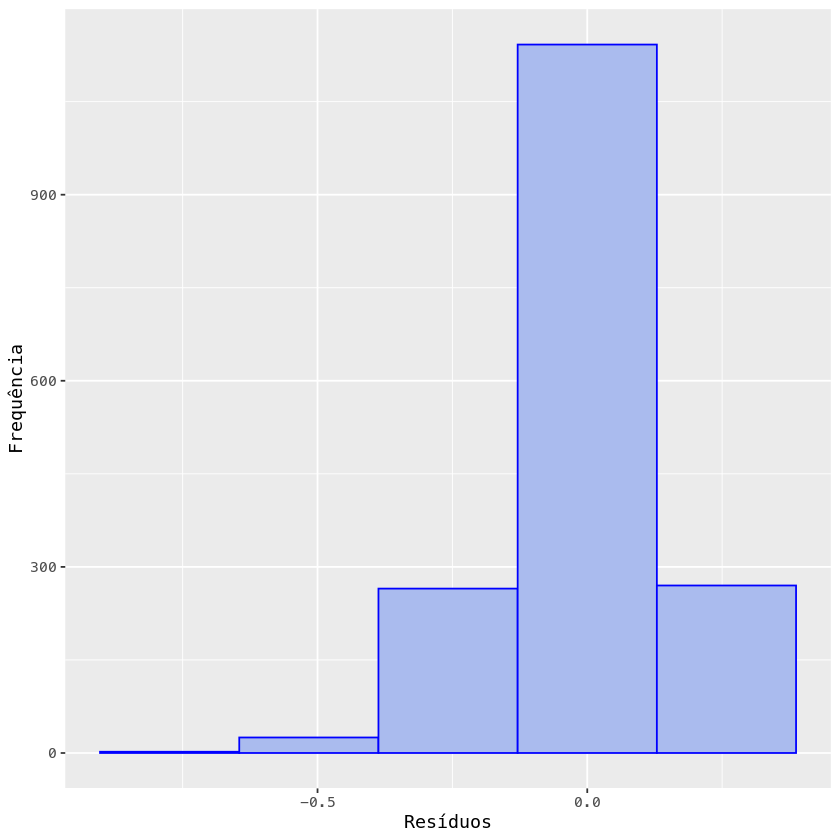

In [55]:
# exibindo o histograma dos resíduos
mod_reglinear.df <- as.data.frame(residuals(mod_reglinear))
names(mod_reglinear.df) <- c('residuos')
ggplot(data = mod_reglinear.df, aes(residuos)) +
    geom_histogram(fill='#aabbee', color = 'blue', stat = 'bin', bins = 5) +
    xlab('Resíduos') +
    ylab('Frequência') +
    theme(plot.caption = element_text(hjust = 0))

Observamos que, apesar da média está em torno de zero, conforme sumário e visualização do histograma, os resíduos da regressão apresentam uma assimetria à esquerda, sugerindo que não seguem uma distribuição normal.

- **ii - Sumário do modelo**

In [56]:
# exibindo o sumário do modelo 
summary(mod_reglinear)


Call:
lm(formula = Y ~ X, data = dados_novo)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67059 -0.06453  0.01978  0.09086  0.36156 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.864177   0.023283  123.02   <2e-16 ***
X           0.146549   0.002821   51.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1445 on 1702 degrees of freedom
Multiple R-squared:  0.6132,	Adjusted R-squared:  0.613 
F-statistic:  2698 on 1 and 1702 DF,  p-value: < 2.2e-16


Pelos resultados do ajuste e considerando o nível de significância de 1%, temos:
o coeficiente intercept (2.86) tem significância estatística, ou seja, o valor do teste estatístico (Pr(>|t|)) obtido está na região crítica e podemos rejeitar a hipótese nula de que ele seja zero.

- **iii - Poder de explicação do modelo**

Vemos que o modelo estimado explica boa parte da variância dos dados; valor do R² adj. = 0.613, mas que eventualmente poderia ser melhorado com a inclusão de outras variáveis explicativas.

---
#### **Problema 3**
---

**Item a)**

In [57]:
# exibindo o dicionário do dataset
cat('Dicionário do Dataset:', '\n')
cat('----------------------', '\n')
cat('1.  symboling         : simbolismo.', '\n')
cat('2.  normalized.losses : perdas normalizadas.', '\n')
cat('3.  make              : fabricante.', '\n')
cat('4.  fuel.type         : tipo de combustível.', '\n')
cat('5.  aspiration        : aspiração.', '\n')
cat('6.  num.of.doors      : número de portas.', '\n')
cat('7.  body.style        : estilo de casco.', '\n')
cat('8.  drive.wheels      : rodas motrizes.', '\n')
cat('9.  engine.location   : localização do motor.', '\n')
cat('10. wheel.base        : base da roda.', '\n')
cat('11. length            : comprimento.', '\n')
cat('12. width             : largura.', '\n')
cat('13. height            : altura.', '\n')
cat('14. curb.weight       : freio-peso.', '\n')
cat('15. engine.type       : tipo de motor.', '\n')
cat('16. num.of.cylinders  : número de cilindros.', '\n')
cat('17. engine.size       : tamanho do motor.', '\n')
cat('18. fuel.system       : sistema de combustível.', '\n')
cat('19. bore              : calibre.', '\n')
cat('20. stroke            : admissão.', '\n')
cat('21. compression.ratio : taxa de compressão.', '\n')
cat('22. horsepower        : cavalos de potência.', '\n')
cat('23. peak.rpm          : pico de rotação.', '\n')
cat('24. city.mpg          : cidade-mpg.', '\n')
cat('25. highway.mpg       : rodovia-mpg.', '\n')
cat('26. price             : preço.', '\n')

Dicionário do Dataset: 
---------------------- 
1.  symboling         : simbolismo. 
2.  normalized.losses : perdas normalizadas. 
3.  make              : fabricante. 
4.  fuel.type         : tipo de combustível. 
5.  aspiration        : aspiração. 
6.  num.of.doors      : número de portas. 
7.  body.style        : estilo de casco. 
8.  drive.wheels      : rodas motrizes. 
9.  engine.location   : localização do motor. 
10. wheel.base        : base da roda. 
11. length            : comprimento. 
12. width             : largura. 
13. height            : altura. 
14. curb.weight       : freio-peso. 
15. engine.type       : tipo de motor. 
16. num.of.cylinders  : número de cilindros. 
17. engine.size       : tamanho do motor. 
18. fuel.system       : sistema de combustível. 
19. bore              : calibre. 
20. stroke            : admissão. 
21. compression.ratio : taxa de compressão. 
22. horsepower        : cavalos de potência. 
23. peak.rpm          : pico de rotação. 
24. city.mpg    

**Item b)**

In [58]:
# definindo o diretório de datasets
setwd('../data')

# lendo o dataset
data <- read.csv('autos.csv', sep=",", header=T); head(data)

# exibindo a estrutura dos dados do dataset
str(data)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
6,2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.

In [80]:
# ajustando o tipo de dado de algumas variáveis do dataset
data$bore <- as.numeric(data$bore)
data$stroke <- as.numeric(data$stroke)
data$horsepower <- as.numeric(data$horsepower)
data$peak.rpm <- as.numeric(data$peak.rpm)
data$price <- as.numeric(data$price)

# exibindo novamente a estrutura dos dados do dataset
str(data)

'data.frame':	205 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 0 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 67.9 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 52 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 3053 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.of.

In [60]:
# verificando se existem valores faltantes no dataset (NAs)
as.data.frame(colSums(is.na(data)))

,colSums(is.na(data))
,<dbl>
symboling,0
normalized.losses,0
make,0
fuel.type,0
aspiration,0
num.of.doors,0
body.style,0
drive.wheels,0
engine.location,0


In [61]:
# criando um novo dataset com os tipos de dados ajustados e os valores faltantes removidos
carros <- data %>% drop_na(); head(carros)

# exibindo a estrutura dos dados do novo dataset
str(carros)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,engine.size,fuel.system,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,2,?,audi,gas,std,two,sedan,fwd,front,99.8,⋯,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


'data.frame':	195 obs. of  26 variables:
 $ symboling        : int  3 3 1 2 2 2 1 1 1 2 ...
 $ normalized.losses: chr  "?" "?" "?" "164" ...
 $ make             : chr  "alfa-romero" "alfa-romero" "alfa-romero" "audi" ...
 $ fuel.type        : chr  "gas" "gas" "gas" "gas" ...
 $ aspiration       : chr  "std" "std" "std" "std" ...
 $ num.of.doors     : chr  "two" "two" "two" "four" ...
 $ body.style       : chr  "convertible" "convertible" "hatchback" "sedan" ...
 $ drive.wheels     : chr  "rwd" "rwd" "rwd" "fwd" ...
 $ engine.location  : chr  "front" "front" "front" "front" ...
 $ wheel.base       : num  88.6 88.6 94.5 99.8 99.4 ...
 $ length           : num  169 169 171 177 177 ...
 $ width            : num  64.1 64.1 65.5 66.2 66.4 66.3 71.4 71.4 71.4 64.8 ...
 $ height           : num  48.8 48.8 52.4 54.3 54.3 53.1 55.7 55.7 55.9 54.3 ...
 $ curb.weight      : int  2548 2548 2823 2337 2824 2507 2844 2954 3086 2395 ...
 $ engine.type      : chr  "dohc" "dohc" "ohcv" "ohc" ...
 $ num.o

Aparentemente, todos os dados foram carregados e estão identificados corretamente. O dataset é composto por 195 observações de 26 variáveis.

**Item c)**

- **i - Sumários estatísticos dos dados**

In [62]:
summary(carros)

   symboling       normalized.losses      make            fuel.type        
 Min.   :-2.0000   Length:195         Length:195         Length:195        
 1st Qu.: 0.0000   Class :character   Class :character   Class :character  
 Median : 1.0000   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 0.7949                                                           
 3rd Qu.: 2.0000                                                           
 Max.   : 3.0000                                                           
  aspiration        num.of.doors        body.style        drive.wheels      
 Length:195         Length:195         Length:195         Length:195        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
      

- **ii - Tabelas quando apropriado**

In [63]:
# criando uma tabela só com a variável make
carros_make <- table(carros$make)

# frequência absoluta dos continentes
cat('Frequência absoluta dos fabricantes:', '\n')
cat('------------------------------------', '\n')
carros_make

Frequência absoluta dos fabricantes: 
------------------------------------ 



  alfa-romero          audi           bmw     chevrolet         dodge 
            3             6             8             3             9 
        honda         isuzu        jaguar         mazda mercedes-benz 
           13             2             3            13             8 
      mercury    mitsubishi        nissan        peugot      plymouth 
            1            13            18            11             7 
      porsche          saab        subaru        toyota    volkswagen 
            4             6            12            32            12 
        volvo 
           11 

In [64]:
# frequência relativa dos fabricantes
cat('Frequência relativa dos fabricantes:', '\n')
cat('------------------------------------', '\n')
prop.table(carros_make) * 100

Frequência relativa dos fabricantes: 
------------------------------------ 



  alfa-romero          audi           bmw     chevrolet         dodge 
    1.5384615     3.0769231     4.1025641     1.5384615     4.6153846 
        honda         isuzu        jaguar         mazda mercedes-benz 
    6.6666667     1.0256410     1.5384615     6.6666667     4.1025641 
      mercury    mitsubishi        nissan        peugot      plymouth 
    0.5128205     6.6666667     9.2307692     5.6410256     3.5897436 
      porsche          saab        subaru        toyota    volkswagen 
    2.0512821     3.0769231     6.1538462    16.4102564     6.1538462 
        volvo 
    5.6410256 

- **iii - Gráficos exploratórios apropriados**

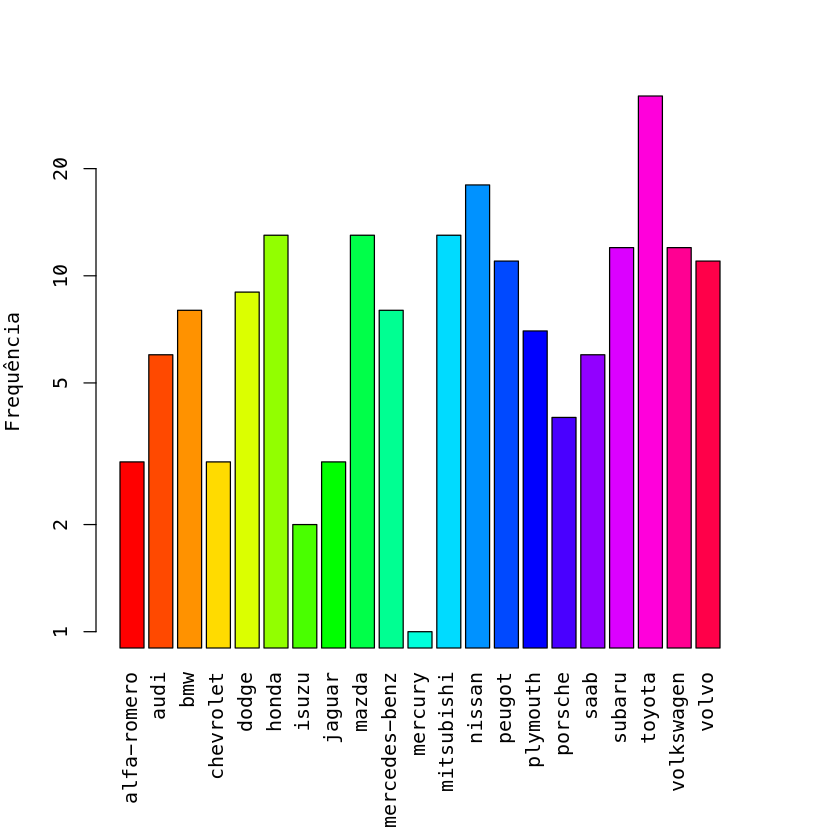

In [65]:
# gráfico de barras da tabela de frequência absoluta dos fabricantes
par(mar=c(8,4,4,4)) # ajustando a margem do gráfico
barplot(carros_make, ylab='Frequência', col=rainbow(21), log='y', las=3)

Abaixo, gráfico de dispersão relacionando a variável "horsepower" com a variável "price". Observamos uma concentração de carros nas faixas de potência de 50 a 125 cavalos e com preços abaixo de $20000. Dessa forma, inferimos que, para essa amostra, os carros mais potentes não necessariamente são os mais caros.

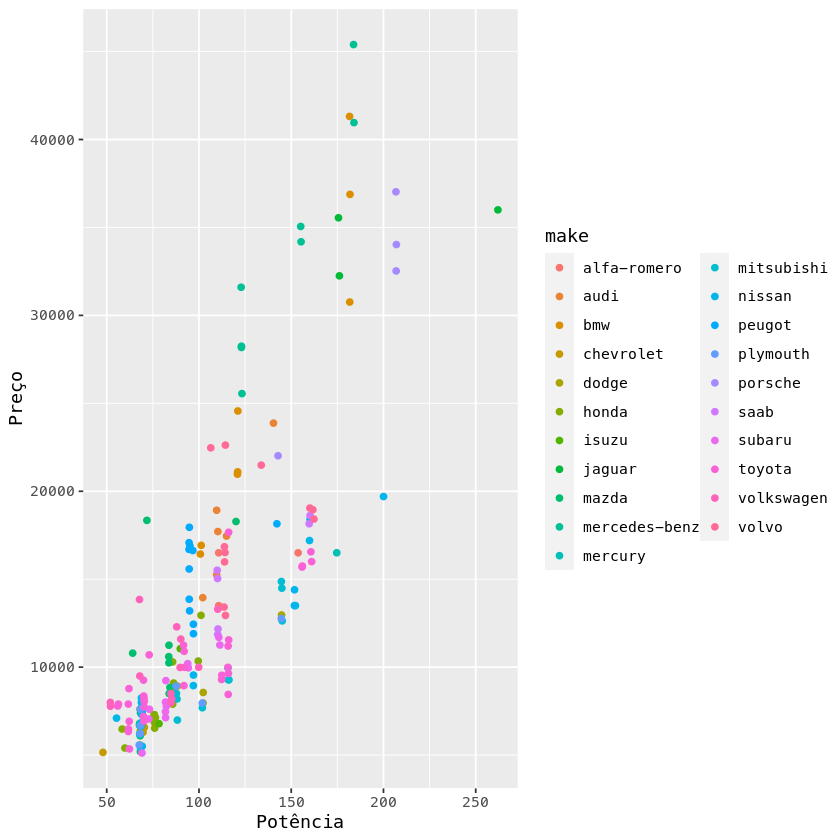

In [66]:
# gráfico para relacionar a variável "horsepower" com a variável "price".
ggplot(data = carros, aes(x=horsepower, y=price, color=make)) +
    geom_point(position='jitter') + 
    labs(x='Potência', y='Preço')

**Item d)**

- **i - Qual sua intuição sobre o relacionamento da “potência” de um carro com o seu preço?**<br>
É de se esperar que as variáveis "horsepower" e "price" sejam diretamente relacionadas.

Criando um modelo de Regressão Linear com as variáveis "horsepower" e "price", sendo que a "horsepower" é a variável explicativa e a "price" é a resposta.

In [67]:
# criando o modelo de regressão linear
reg <- lm(price ~ horsepower, carros); reg


Call:
lm(formula = price ~ horsepower, data = carros)

Coefficients:
(Intercept)   horsepower  
    -4570.1        172.5  


**Item e)**

In [68]:
# exibindo o sumário do modelo
summary(reg)


Call:
lm(formula = price ~ horsepower, data = carros)

Residuals:
     Min       1Q   Median       3Q      Max 
-10238.1  -2288.7   -470.4   1843.1  18223.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4570.109    985.088  -4.639 6.44e-06 ***
horsepower    172.536      8.958  19.260  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4725 on 193 degrees of freedom
Multiple R-squared:  0.6578,	Adjusted R-squared:  0.656 
F-statistic: 370.9 on 1 and 193 DF,  p-value: < 2.2e-16


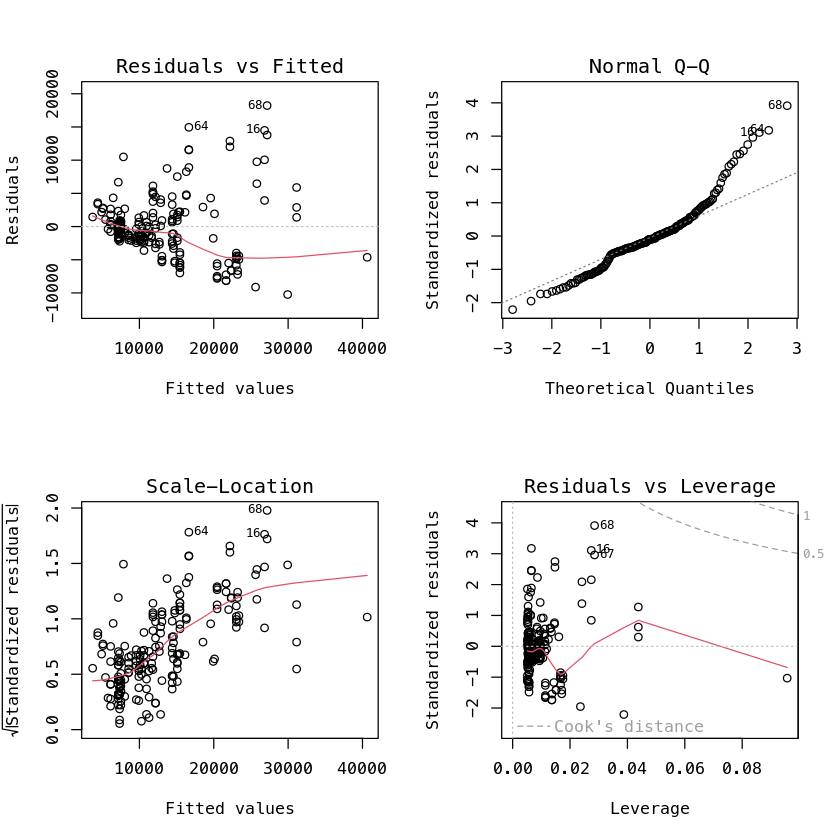

In [69]:
# gerando os gráficos diagnósticos do modelo
par(mfrow=c(2,2))
plot(reg)

Topo esquerda:

O gráfico mostra os resíduos no eixo y contra os valores ajustados no eixo x. Neste caso, os resíduos se aproximam de uma distribuição aleatória, no entanto, para valores menores da variável resposta (price) há indícios de que os dados seguem um padrão parecido e que, portanto, ajustar uma reta não é a melhor opção de modelo.

Topo direita:

O gráfico apresenta qqnorm (normal) que deve ser uma linha reta se os erros são normalmente distribuídos. Neste gráfico vemos que os resíduos não seguem uma distribuição normal dentro do que seria aceitável. Há uma discrepância na parte superior do gráfico, indicando que eles seguem alguma outra distribuição.

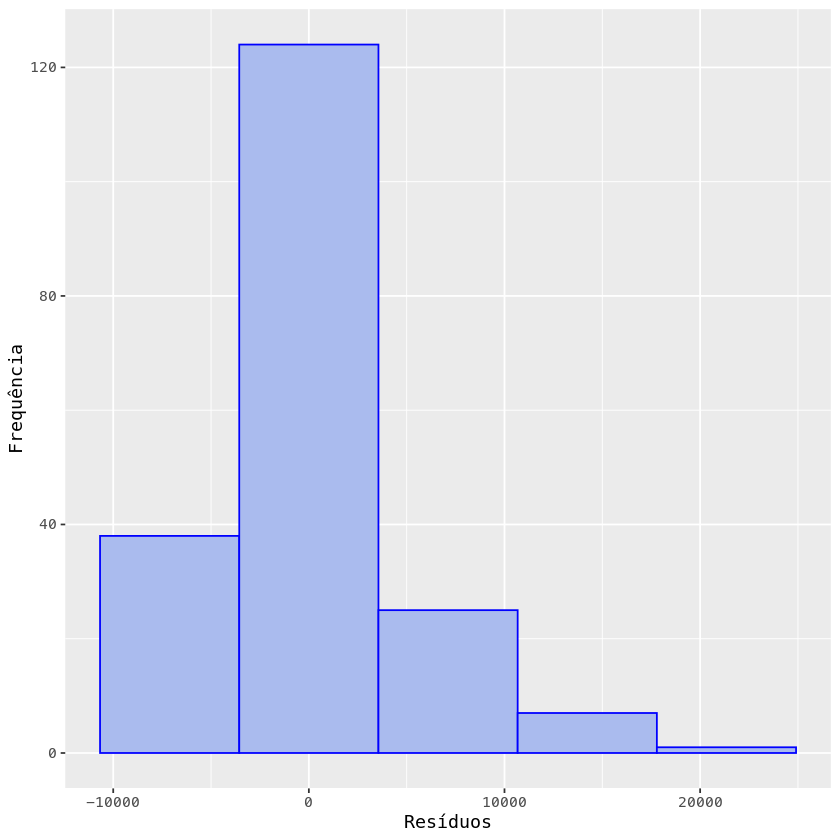

In [70]:
# exibindo o histograma dos resíduos
reg.df <- as.data.frame(residuals(reg))
names(reg.df) <- c('residuos')
ggplot(data = reg.df, aes(residuos)) +
    geom_histogram(fill='#aabbee', color = 'blue', stat = 'bin', bins = 5) +
    xlab('Resíduos') +
    ylab('Frequência') +
    theme(plot.caption = element_text(hjust = 0))

Observamos que os resíduos da regressão apresentam uma assimetria à direita, sugerindo que não seguem uma distribuição normal.

(Intercept)  horsepower 
 -4570.1092    172.5362

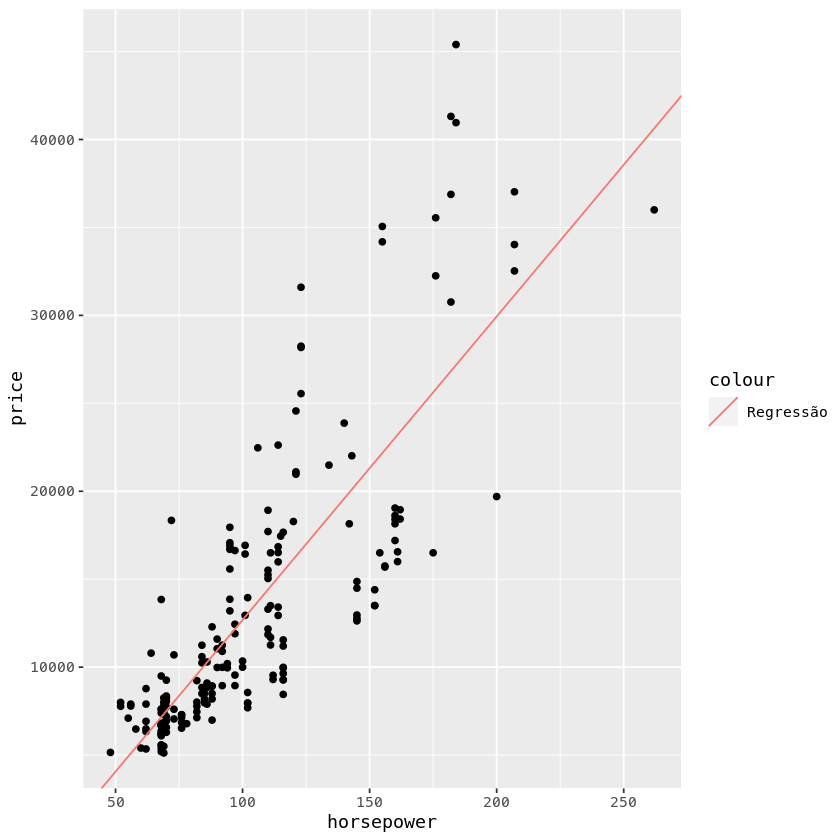

In [71]:
cofs <- coefficients(reg); cofs
ggplot(data = carros, aes(x=horsepower, y=price)) +
    geom_point() +
    geom_abline(aes(intercept=cofs[1], slope=cofs[2], color='Regressão'), show.legend=TRUE)

**Item f)**

- **i - Em que posição a reta corta o eixo Y? Isso faz sentido?**<br><br>
A reta corta o eixo Y na posição -4570.1 ("Intercept" do modelo de regressão), o que não faz sentido, pois é como se o preço de um carro com potência zero fosse negativo.

- **ii - Como corrigir um modelo que apresenta este comportamento?**<br><br>
Uma alternativa para corrigir esse problema é transformar essas variáveis usando seus logaritmos. Para isso, vamos adicionar duas novas colunas ao dataframe "carros", por meio da função MUTATE:

In [72]:
# criando duas novas variáveis no dataset
carros <- carros %>% mutate(lprice=log(price), lhorsepower=log(horsepower)); head(carros, 5)

,symboling,normalized.losses,make,fuel.type,aspiration,num.of.doors,body.style,drive.wheels,engine.location,wheel.base,⋯,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price,lprice,lhorsepower
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,3.47,2.68,9,111,5000,21,27,13495,9.510075,4.709530
2,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,⋯,3.47,2.68,9,111,5000,21,27,16500,9.711116,4.709530
3,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,⋯,2.68,3.47,9,154,5000,19,26,16500,9.711116,5.036953
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,⋯,3.19,3.40,10,102,5500,24,30,13950,9.543235,4.624973
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,⋯,3.19,3.40,8,115,5500,18,22,17450,9.767095,4.744932


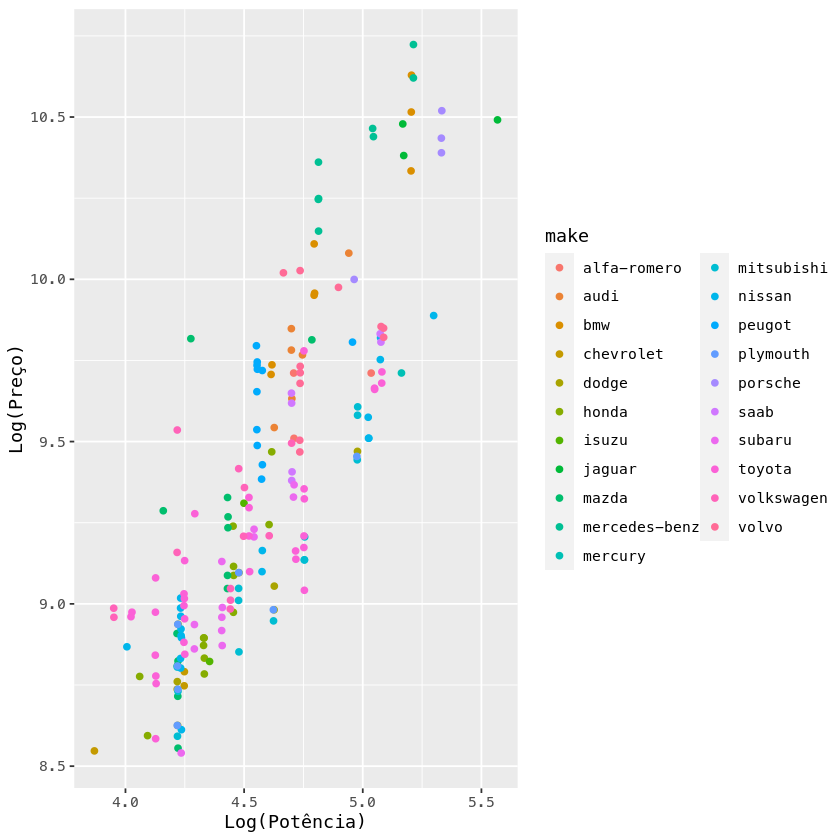

In [73]:
# gráfico para relacionar a variável "lhorsepower" com a variável "lprice".
ggplot(data = carros, aes(x=lhorsepower, y=lprice, color=make)) +
    geom_point(position='jitter') + 
    labs(x='Log(Potência)', y='Log(Preço)')

In [74]:
# criando o modelo de regressão linear
logreg <- lm(lprice ~ lhorsepower, carros); logreg


Call:
lm(formula = lprice ~ lhorsepower, data = carros)

Coefficients:
(Intercept)  lhorsepower  
      3.601        1.256  


In [75]:
# exibindo o sumário do modelo
summary(logreg)


Call:
lm(formula = lprice ~ lhorsepower, data = carros)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.52912 -0.18580 -0.05501  0.19139  0.84510 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.60091    0.26752   13.46   <2e-16 ***
lhorsepower  1.25590    0.05828   21.55   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2765 on 193 degrees of freedom
Multiple R-squared:  0.7064,	Adjusted R-squared:  0.7049 
F-statistic: 464.3 on 1 and 193 DF,  p-value: < 2.2e-16


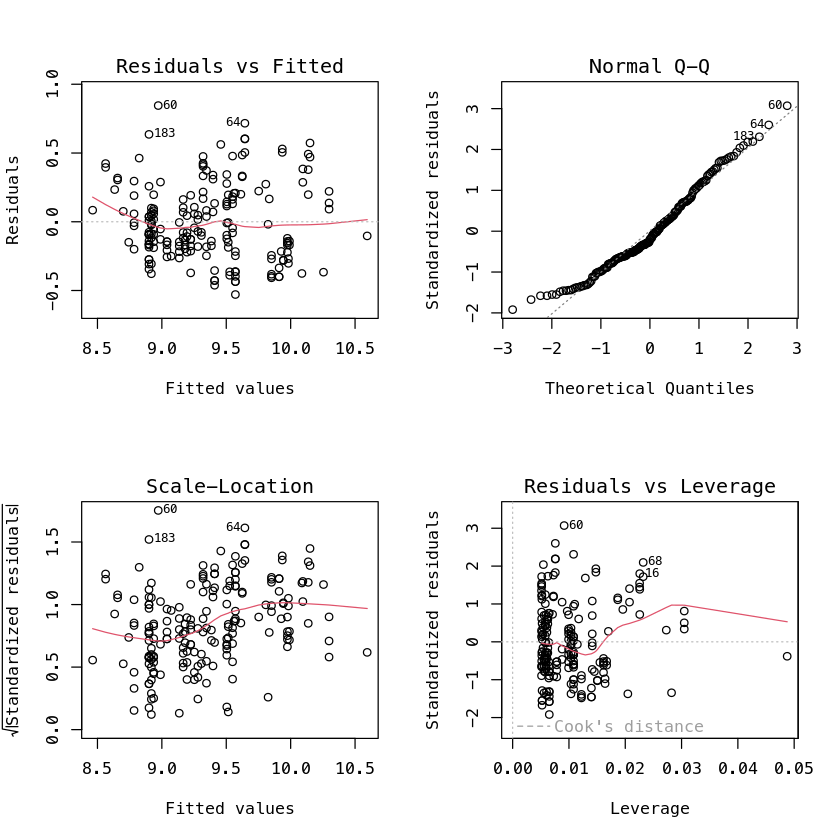

In [76]:
# gerando os gráficos diagnósticos do modelo
par(mfrow=c(2,2))
plot(logreg)

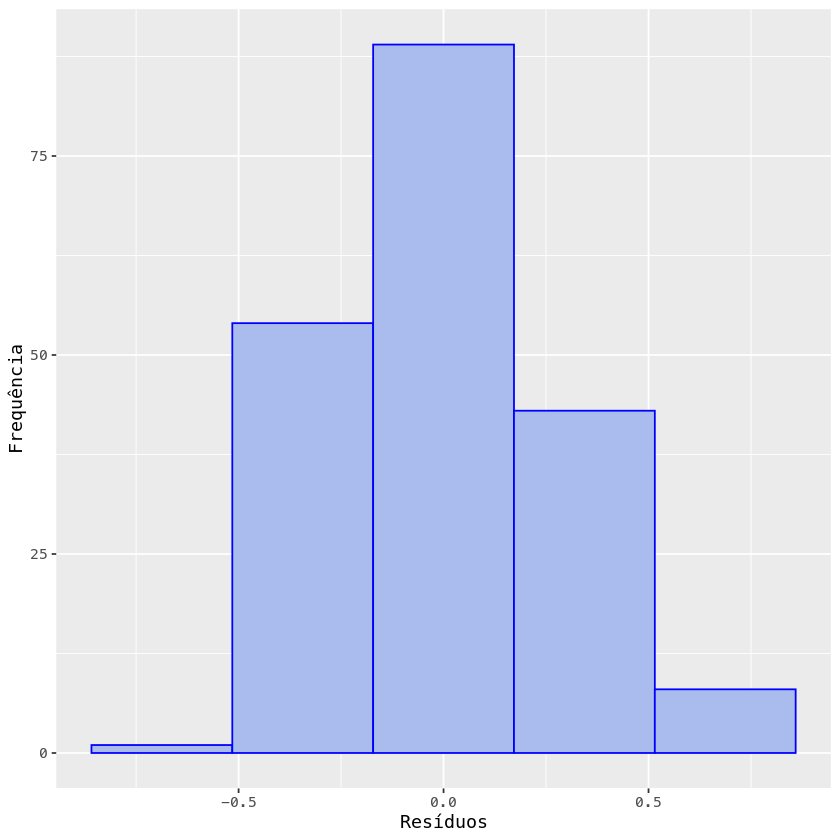

In [77]:
# exibindo o histograma dos resíduos
logreg.df <- as.data.frame(residuals(logreg))
names(logreg.df) <- c('residuos')
ggplot(data = logreg.df, aes(residuos)) +
    geom_histogram(fill='#aabbee', color = 'blue', stat = 'bin', bins = 5) +
    xlab('Resíduos') +
    ylab('Frequência') +
    theme(plot.caption = element_text(hjust = 0))

Observa-se que a distribuição dos resíduos da regressão com as variáveis transformadas pela aplicação do logaritmo às variáveis "price" e "horsepower" está mais próxima de uma normal.

(Intercept) lhorsepower 
   3.600905    1.255896

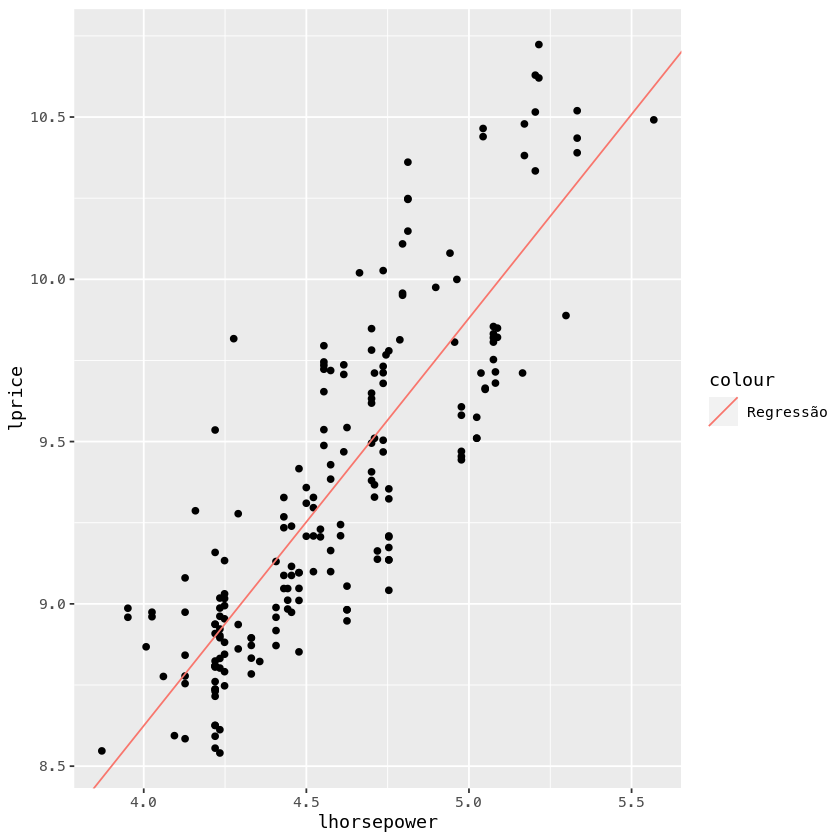

In [78]:
cofs <- coefficients(logreg); cofs
ggplot(data = carros, aes(x=lhorsepower, y=lprice)) +
    geom_point() +
    geom_abline(aes(intercept=cofs[1], slope=cofs[2], color='Regressão'), show.legend=TRUE)

Conforme o sumário e o gráfico acima, vemos que o problema do "Intercept" negativo foi resolvido. Além disso, todos os coeficientes da nova regressão continuam estatisticamente significantes e o poder de explicação do modelo apresentou uma melhora, atingindo 70.4%.

**Item g)**

- **i - O que indica isso no seu ajuste?**<br><br>
Vemos que o modelo estimado explica boa parte da variância dos dados; valor do R² adj. = 0.656, mas que eventualmente poderia ser melhorado com a inclusão de outras variáveis explicativas, notadamente, para tentar melhorar o ajuste do modelo para os valores maiores da variável "horsepower". Esse problema também se associa à baixa representatividade nessa amostra dos carros mais potentes.
<br><br>
Abaixo, gráfico de dispersão relacionando a variável "horsepower" com a variável "price", facetado pela marca do veículo. Observamos uma concentração de carros nas faixas de potência de 50 a 125 cavalos e com preços abaixo de $20000. Verificamos que carros das mesmas marca e potência apresentam preços diferentes, o que sugere a influência de outras variáveis na determinação do preço. Por meio do gráfico, constatamos que, para essa amostra, os carros mais potentes não necessariamente são os mais caros.

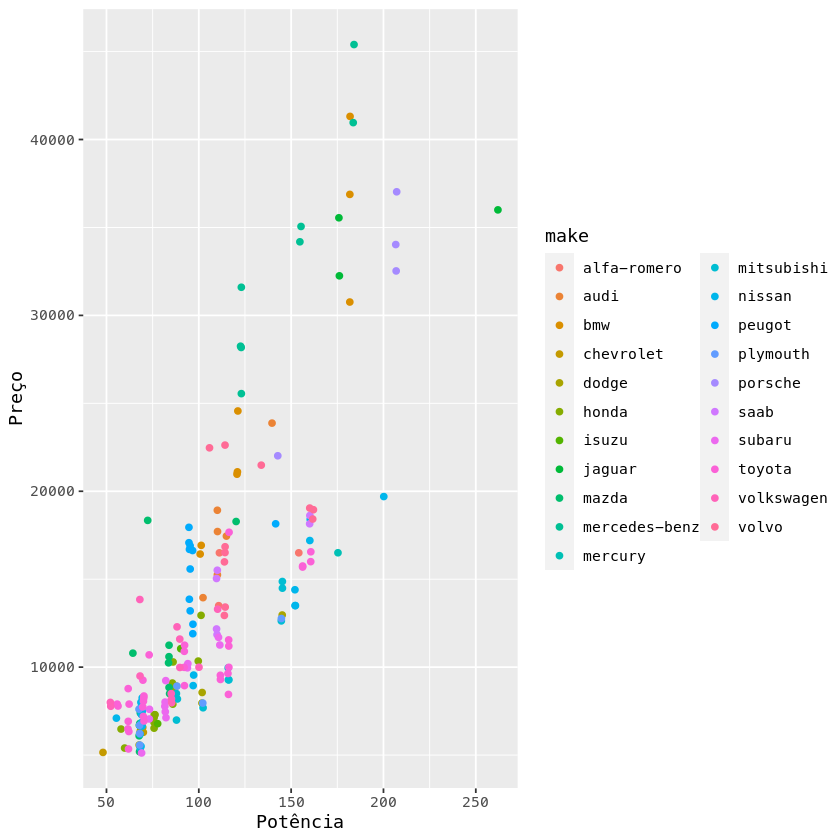

In [79]:
# gráfico para relacionar a variável "horsepower" com a variável "price".
ggplot(data = carros, aes(x=horsepower, y=price, color=make)) +
    geom_point(position='jitter') + 
    labs(x='Potência', y='Preço')